<div id="container" style="position:relative;">
<div style="float:left">

***Kazi Shahid***

***BrainStation Data Science Diploma Candidate***

=============================================================

***Project SteamBuzz: Will Our Game Create a Buzz in the Steam community?***
    
***Part 4 (b): Sentiment Analysis ML Model 2 - Random Forest Classifier***
</div>
<div style="position:relative; float:right"><img style="height:100px" src ="https://i.ibb.co/mcvpL4Z/Steam-Buzz-logo.png" />
</div>
</div>

---
# Overview

In this part of the project, we will train a Random Forest ("RF") classifier on the data.

An RF model is [defined](https://dl.acm.org/doi/10.1145/3357384.3357891) as a set of decision trees ("DTs"), each of which is trained using random subsets of features. It uses [bagging and feature randomness](https://askinglot.com/is-random-forest-good-for-text-classification) when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree. Given an instance, the prediction by the RF is obtained via majority voting of the predictions of all the trees in the forest.

---
# Process Flow

The process flow for this part of the project is as follows:

1. Loading the dataset as was prepared and preprocessed in Part 3 of the project
2. Employing the classifier and optimizing its hyperparameters through Grid Search and cross validation
3. Choosing the parameter values for which the classifier performed the best and re-employing the classifier with the optimized hyperparameters
4. Evaluating the model using the appropriate performance measures
6. Wrapping up with concluding remarks, summarizing the results

In [6]:
# Importing the necessary data analysis and visualization toolkits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# To display ALL the columns in the dataframes
pd.options.display.max_columns=None

# To display a considerable extent (first 500 characters) of the content of each column of the dataframes
pd.set_option('display.max_colwidth', 100)

# Filtering out potential warnings
import warnings
warnings.filterwarnings('ignore')

---
# Loading the Training and Test Datasets

First, we load the X (features) and y (target) training and test datasets as cleaned up in Part 3 of the project, and check that their shapes to confirm that they loaded correctly.

In [7]:
# Importing the X_train, X_test, y_train, and y_test datasets from the respective pickle files into Pandas DataFrame forms
X_train = pd.read_pickle("data\\X_train.pkl")
X_test = pd.read_pickle("data\\X_test.pkl")
y_train = pd.read_pickle("data\y_train.pkl")
y_test = pd.read_pickle("data\y_test.pkl")

# Note: The destination paths above includes a duplicated backslash ("\\") rather than single ("\") as otherwise it shows the below error
# "SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 4-5: truncated \xXX escape"
# This is because the "\x..." ("\x_train" in our case) starts an 8-character Unicode escape where digits follow the "\x"
# But in our case, digits do not follow the "\x..." ("\x_train" in our case), making the escape invalid and throwing an error
# This error has been resolved based on https://stackoverflow.com/a/1347854

In [8]:
# Checking that the datasets loaded correctly, displaying the shapes
## Displaying the dataframes themselves take a lot of time, hence choosing to display their shapes
print(f"Shape of X_train dataset: {X_train.shape}")
print(f"Shape of X_test dataset: {X_test.shape}")
print(f"Shape of y_train dataset: {y_train.shape}")
print(f"Shape of y_test dataset: {y_test.shape}")

Shape of X_train dataset: (55248, 7729)
Shape of X_test dataset: (13812, 7729)
Shape of y_train dataset: (55248,)
Shape of y_test dataset: (13812,)


The shapes of the four sets match the outputs in Part 3 of the project. We can proceed with working them into our ML model in this part.

# Selection of Hyperparameters for Random Forest Classifier

The definition and overview of RF has been discussed in Part 4 of this project. A full list and description of the many hyperparameters we can tune in a RF can be found in [its documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

We will consider setting / tuning the two most impactful and important hyperparameters for a RF, as discussed below.


## Maximum Depth of Trees (`max_depth` Parameter)

`max_depth` represents the depth of each tree in the forest. The higher the `max_depth` value, the deeper goes the tree, the more splits it has, and the more information it captures about the data. If we go too deep however, the model starts to overfit to the training data.

Its default value is `None`, which means that its DTs will keep growing until some loss criteria are minimized.

We will iterate through a range of `max_depth` value: `max_depth = 10, 30, 50, 100`.


## Number of Estimators (`n_estimators` Parameter)

The `n_estimators` hyperparameter sets the number of DTs that will be built within the RF. Its default value is `10`, i.e., the RF will build 10 DTs of infinite depth, and the final prediction will be determined based on these 10 DTs' votes. We will iterate through a range of `n_estimators` value: `n_estimators = 10, 50, 100, and 150`.

# Employing RF Classifier

We start by instantiating a RF classifier object for our modelling. Then we will set up the function to iterate through the two hyperparameters chosen for this model in line with our [hyperparameter selection section above](#Selection-of-Hyperparameters-for-Random-Forest-Classifier).


## Instantiating a RF Classifier Object

We start by instantiating a RF classifier object for our modelling. Then we will set up the function to iterate through the two hyperparameters chosen for this model in line with our [hyperparameter selection section above](#Selection-of-Hyperparameters-for-Random-Forest-Classifier).

In [19]:
# Importing Random Forest classifier from scikit-learn library's ensemble module
from sklearn.ensemble import RandomForestClassifier

# Instantiating a Random Forest classifier object for our modelling (not passing any parameters yet as we will set them and iterate through later)
rfc = RandomForestClassifier()

## Hyperparameter Setup

We are defining the hyperparameters to optimize for our RF classifier, which are the `max_depth` and `n_estimators`. We will take a range of values to iterate through as discussed in the [hyperparameter selection section above](#Selection-of-Hyperparameters-for-Random-Forest-Classifier) and set them as such.

In [16]:
# Creating a dictionary for the hyperparameters to iterate through and optimize
parameters = {'n_estimators': [10, 50, 100, 150],
                   'max_depth': [10, 30, 50, 100, None]}

## GridSearchCV Setup

Now we will set up the `GridSearchCV` with the appropriate values.

In [17]:
# Importing GridSearchCV from scikit-learn library's model_selection module
from sklearn.model_selection import GridSearchCV

In [89]:
# Creating a RF classifier object for GridSearchCV
## Asking the GridSearchCV to iterate through the parameters values we set above
## Setting the cross validation fold to 3
rfc_gscv = GridSearchCV(rfc, parameters, cv=5)

## Hyperparameter Optimization

Now we will optimize the hyperparameters by iterating through the parameter values, testing via cross validation, and checking the results with which the classifier performed the best.

In [20]:
# Creating a dictionary for the hyperparameters to iterate through and optimize
parameters = {'n_estimators': [10, 50, 100, 150],
                   'max_depth': [10, 30, 50, 100, None]}

# Creating a RF classifier object for GridSearchCV
## Asking the GridSearchCV to iterate through the parameters values we set above
## Setting the cross validation fold to 3
rfc_gscv = GridSearchCV(rfc, parameters, cv=5)

In [92]:
# Importing time module
import time
t1 = time.perf_counter() # Track start time of running this cell

# Fitting the RF classifier object to train data
rfc_gscv.fit(X_train, y_train)
t2 = time.perf_counter() # Track end time of running this cell
print(f"Execution time: {round(t2-t1)} seconds") # Show execution time


Execution time: 11679 seconds


We see that the model performed its best with the below hyperparameter values:

In [94]:
rfc_gscv.best_params_

{'max_depth': None, 'n_estimators': 150}

Looking at the `GridSearchCV` results in further detail:

In [93]:
pd.DataFrame(rfc_gscv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,20.426486,2.888246,0.778467,0.445388,10,10,"{'max_depth': 10, 'n_estimators': 10}",0.721991,0.703167,0.706425,0.693275,0.698434,0.704659,0.009737,20
1,25.464876,0.125683,0.617728,0.008729,10,50,"{'max_depth': 10, 'n_estimators': 50}",0.733122,0.726244,0.733756,0.726220,0.716354,0.727139,0.006285,19
2,33.966691,0.164997,0.683162,0.010510,10,100,"{'max_depth': 10, 'n_estimators': 100}",0.726606,0.730769,0.732127,0.724590,0.737352,0.730289,0.004462,18
3,42.579338,0.126178,0.752224,0.011187,10,150,"{'max_depth': 10, 'n_estimators': 150}",0.735566,0.732398,0.732670,0.728211,0.734094,0.732588,0.002463,17
4,22.935058,0.149800,0.575928,0.005808,30,10,"{'max_depth': 30, 'n_estimators': 10}",0.756923,0.752670,0.748597,0.753100,0.754910,0.753240,0.002766,16
5,48.387241,0.181735,0.743478,0.008698,30,50,"{'max_depth': 30, 'n_estimators': 50}",0.785249,0.777557,0.782715,0.780433,0.789664,0.783123,0.004140,14
6,79.249939,0.383616,0.941049,0.014511,30,100,"{'max_depth': 30, 'n_estimators': 100}",0.789231,0.783982,0.792941,0.785772,0.791203,0.788626,0.003327,10
7,110.930246,0.759688,1.140492,0.002004,30,150,"{'max_depth': 30, 'n_estimators': 150}",0.790226,0.780995,0.793937,0.782695,0.794461,0.788463,0.005623,11
8,27.510008,0.162551,0.606360,0.011770,50,10,"{'max_depth': 50, 'n_estimators': 10}",0.772670,0.764525,0.776471,0.770115,0.777174,0.772191,0.004614,15
9,70.581886,0.771900,0.863824,0.013907,50,50,"{'max_depth': 50, 'n_estimators': 50}",0.804253,0.796471,0.804977,0.797448,0.806317,0.801893,0.004094,9


As we can see from the `rank_test_score` column furthest to the right, the last row was ranked #1 with `max_depth = None` and `n_estimators = 100` (referring to the `params` column). The `mean_test_score` for the five validation sets was the highest at 82.445%, though the score using the other `n_estimators` values were very close as well (differing only in the hundredth decimal points). However, we know that if we set `max_depth` to `None`, the RF classifier will overfit as we are letting it go really deep, branching into so many decision rules for classification. So we should disregard this value for `max_depth`, and look at the `mean_test_score` values for the other `max_depth` values:

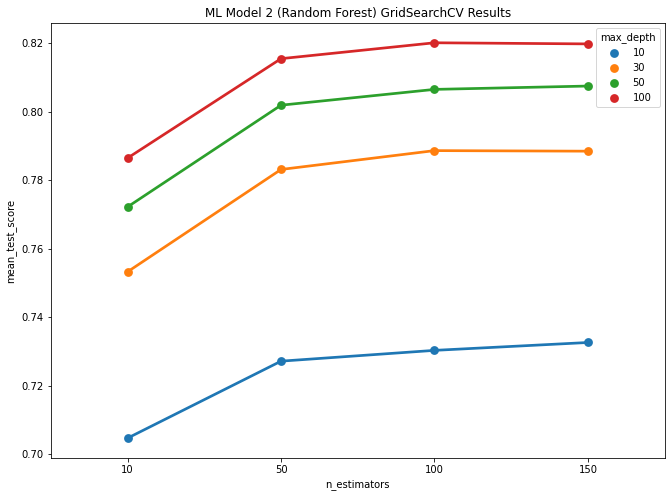

In [95]:
# Defining a function for the Gridsearch CV result plot
## Code modified from https://stackoverflow.com/a/55766938

## Defining each item of the function
### 'cv_results' refers to our GridSearchCV instance's 'cv_results_' attribute
### 'param_x' refers to the parameter to plot along X-axis
### 'score_y' refers to the metric to plot along Y-axis
### 'param_line' refers to the parameter to identify each line in the plot

def plot_cv_results(cv_results, param_x, param_line, score_y='mean_test_score'):
    cv_results = pd.DataFrame(cv_results)
    col_x = 'param_' + param_x
    col_z = 'param_' + param_line
    fig, ax = plt.subplots(1, 1, figsize=(11, 8))
    sns.pointplot(x=col_x, y=score_y, hue=col_z, data=cv_results, ci=99, n_boot=64, ax=ax)
    ax.set_title("ML Model 2 (Random Forest) GridSearchCV Results")
    ax.set_xlabel(param_x)
    ax.set_ylabel(score_y)
    ax.legend(title=param_line)
    return fig

# Plotting the GridSearchCV results (scores) for this model's hyperparameter optimization
fig = plot_cv_results(rfc_gscv.cv_results_, 'n_estimators', 'max_depth')

As we can see from the above:
- The higher the `max_depth` value goes, the more the plot line shifts upward, signifying better `mean_test_score` sets. We get the best score at `max_depth = 100`, which is still not quite hitting the 82% accuracy score, meaning it still has not quite overfit.
- The higher the `n_estimators`, the higher the `mean_test_score` value goes but at a diminishing rate. For `max_depth=100`, `n_estimators` hits the peak at 100, and then slightly goes down. We can choose `n_estimators=100` as the optimum value, as it will also make sense from computational efficiency perspective as well (choosing `n_estimators=150` will add 50 more DTs to the model, increasing model fitting runtime).

## Best RF Classifier Model with Optimized Hyperparameter

We will re-employ the model, but with the optimum hyperparameter values as discussed above: `n_estimators = 100` and `max_depth = 100`.

In [21]:
# Instantiating a RF classifier object for this model with the best parameters
rfc_gscv_best = RandomForestClassifier(n_estimators=100, max_depth=100)

In [22]:
t3 = time.perf_counter() # Track start time of running this cell

# Fitting to the train datasets with the optimum hyperparameters for this model
rfc_gscv_best.fit(X_train, y_train);

t4 = time.perf_counter() # Track end time of running this cell
print(f"Execution time: {round(t4-t3)} seconds") # Show execution time

Execution time: 226 seconds


We can see that the RF model fits quite efficiently, taking only 204 seconds (about 3 and half minutes) in the local machine.

# Model Evaluation

We will now evaluate how well the multinomial NB model learned from the input variables, by measuring how well it is able to predict the output values.

## Accuracy Scores

Accuracy is defined as the proportion of examples for which the model produces the correct output. We will calculate this measure now.

In [36]:
## Scoring the model
print(f"Accuracy score of the Train model: {round(rfc_gscv_best.score(X_train, y_train)*100,4)}%")
print(f"Accuracy score of the Test model: {round(rfc_gscv_best.score(X_test, y_test)*100,4)}%")

Accuracy score of the Train model: 96.9773%
Accuracy score of the Test model: 82.6455%


This is a bit less-than-ideal result as:
- The train accuracy score is about 97%, which is a clear indication of overfitting to the train data, and
- The test accuracy score is good at about 83%, but the difference between the train and test model accuracy scores are quite large, indicating that the model is not generalizing as well.

However, as discussed before, accuracy scores give a high-level, general indication. We need to go beyond accuracy scores and look into the model's confusion matrix to get a better idea of how well the model is actually performing. Although, based on the fact that the dataset is perfectly balanced between the two classes, we can expect the accuracy score to be a quite reliable measure - we can confirm this based on the next performance measures.

## Confusion Matrix

A [confusion matrix](https://machinelearningmastery.com/confusion-matrix-machine-learning/#:~:text=A%20confusion%20matrix%20is%20a%20summary%20of%20prediction%20results%20on,key%20to%20the%20confusion%20matrix.) (aka "error matrix") is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class.

Generating the confusion matrix for the model:

In [34]:
# Import confusion matrix
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

In [23]:
# Generating class predictions
y_pred = rfc_gscv_best.predict(X_test)

# Creating the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Specifying confusion matrix rows and columns labels
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted negative (0) rating", "Predicted positive (1) rating"],
    index=["True negative (0) rating", "True positive (1) rating"]
)

display(cf_df)

,Predicted negative (0) rating,Predicted positive (1) rating
True negative (0) rating,5770,1076
True positive (1) rating,1321,5645


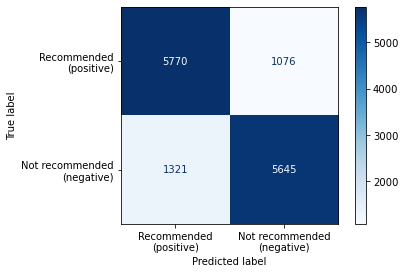

In [35]:
# Specifying class labels to show in the confusion matrix axes
classes = ['Recommended\n(positive)', 'Not recommended\n(negative)']

# Plotting confusion matrix, setting the expected estimator, inputs and target as parameters
## Displaying class labels on the axes
## Setting colour map to "Blues" to be in line with the Steam platform colour scheme throughout the project
## Passing values_format as '', otherwise it displays in scientific notation (e.g., "5878" is displayed as 5.878e3 which may be confusing for readers)
plot_confusion_matrix(rfc_gscv_best, X_test, y_test,
                      display_labels=classes,
                      cmap=plt.cm.Blues,
                      values_format = '');

As we can see from the above confusion matrix:
- **True Positive** ("TP") quadrant (top-left box): The model predicted 5,770 positive ratings which were truly positive ratings, i.e., 5,770 **accurate** predictions of **"positive"** ratings.


- **False Negative** ("FN") quadrant (top-right box): The model predicted 1,076 negative ratings which were actually positive ratings, i.e., 1,076 **inaccurate** predictions of **"negative"** ratings.


- **False Positive** ("FP") quadrant (bottom-left box): The model predicted 1,321 positive ratings which were actually negative ratings, i.e., 1,321 **inaccurate** predictions of **"positive"** ratings.


- **True Negative** ("TN") quadrant (bottom-right box): The model predicted 5,645 negative ratings which were truly negative ratings, i.e., 5,645 **accurate** predictions of **"negative"** ratings.

This is a better measure of the model's performance than accuracy score, as it paints a more in-depth picture of how many accurate and inaccurate predictions were made by the model. This paves the way to introducing 'Precision' and 'Recall' as performance measures.

## Precision

**Precision** measures the proportion of positive identifications that were actually correct.

In formulaic expression:

$$Precision = \frac{TP}{TP+FP}$$

Now, calculating the precision for our model -

In [32]:
# Importing precision score module
from sklearn.metrics import precision_score

# Calculating precision score for ML Model #3-d
print(f"Precision: {round(precision_score(y_test, y_pred)*100, 2)}%")

Precision: 83.99%


This is a quite good result in the sense that, of all the reviews that were predicted as positive plus the reviews that were actually positive, the model **accurately predicted the positive reviews about 84% of the time**.

## Recall

**Recall** measures the proportion of actual positives that were identified correctly.

In formulaic expression:

$$Recall = \frac{TP}{TP+FN}$$

Now, calculating the recall for our model -

In [31]:
# Recall
from sklearn.metrics import recall_score

# Calculating recall score for ML Model #3-d
print(f"Recall: {round(recall_score(y_test, y_pred)*100, 2)}%")

Recall: 81.04%


This is also a good result. This means that of all the reviews that were actually positive, **the model accurately predicted the positive reviews slightly more than 81% of the time**.

The recall score is slightly lower than the precision score. However, our project is not very sensitive to having false positives (as opposed to, say, in disease-diagnosis, where false positives can be fatal as it means that the disease would go undiagnosed and therefore untreated for some time), so this is not a big issue.

## F1-Score

The F1-score is another popular accuracy measure, which balances the precision and recall measures. F1-score is the harmonic mean of the precision and recall scores, calculated as follows:

$$F_1 = 2 \cdot \frac{precision \cdot recall}{precision + recall}$$

Now, calculating the F1-score for our model -

In [30]:
# Recall
from sklearn.metrics import f1_score

# Calculating recall score for ML Model #3-d
print(f"F1 Score: {round(f1_score(y_test, y_pred)*100, 2)}%")

F1 Score: 82.49%


This is good result as portrayed by the harmonic mean (balance) of the precision and recall measures, signifying that the model accurately predicts the outcome of the review texts more than 82% of the time.

## ROC AUC

The Receiver Operating Characteristic (ROC) curve is formed by plotting the [true positive rate (TPR)](https://www.split.io/glossary/false-positive-rate/#:~:text=The%20true%20positive%20rate%20(TPR,as%20TN%2FTN%2BFP.) against the [false positive rate (FPR)](https://www.ibm.com/support/producthub/icpdata/docs/content/SSQNUZ_latest/wsj/model/wos-quality-fpr.html). The area under the ROC curve (AUC) is an associated metric that represents, after plotting the ROC curve, the measure of the area under the curve.

Now, calculating the ROC AUC score for our model -

In [29]:
# Recall
from sklearn.metrics import roc_auc_score

# Calculating recall score for ML Model #3-d
print(f"ROC AUC Score: {round(roc_auc_score(y_test, y_pred)*100, 2)}%")

ROC AUC Score: 82.66%


This score signifies that the model is capable of accurately distinguishing between the two outcome classes about 83% of the time; i.e., when a review text is passed through the model, it is able to accurately separate the positive-sentiment reviews from the negative-sentiment ones accurately about 83% of the time.

Now, when plotting the curve, we find the following:

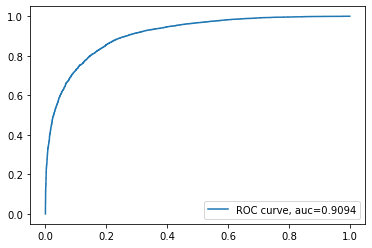

In [27]:
# Importing metrics from scikit-learn library
from sklearn import metrics

# Plotting the ROC AUC curve

## Calculating probability of predicting outcome variable classes and plotting the ROC AUC curve
y_pred_probab = rfc_gscv_best.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_probab)
auc = metrics.roc_auc_score(y_test, y_pred_probab)
plt.plot(fpr, tpr, label="ROC curve, auc="+str(round(auc,4)))
plt.legend(loc=4)
plt.show()

We see in the plot that the area under the curve is about 91%. This implies that, when the model is presented with two random reviews, one from the positive-review class and one from the negative-review class, it is more confident that the positive point belongs to the positive class than the negative point belonging to the positive class.

---
# Conclusion

We can confidently conclude that this model performed moderately well as we have observed:
- [Very high train accuracy score and high test accuracy scores](#Accuracy-Scores) (both over 85%, though sign of overfitting as train accuracy score was around 97% and the discrepancy between the two scores was high)
- High [precision](#Precision), [recall](#Recall), [F1](#F1-Score) as well as [ROC AUC scores](#ROC-AUC) (all above or around 80%)

Statistically speaking, if we had to blindly guess the class (positive/negative) for a review, we would have been expected to be correct about 50% of the time (as the dataset's class distribution is 50/50). From this standpoint, this ML model has **added significant value by adding a substantial (more than 35%) increase in accuracy** in predicting the classes based on input values.

For quick reference, the accuracy, precision, recall, and F1 scores are also summarized and tabulated below:

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[5770 1076]
 [1321 5645]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.83      6846
           1       0.84      0.81      0.82      6966

    accuracy                           0.83     13812
   macro avg       0.83      0.83      0.83     13812
weighted avg       0.83      0.83      0.83     13812

0.8264552562988705


In [28]:
# Saving the best model locally for retrieval in later part of the project as needed

## Importing pickle
import pickle

## Saving the model locally
pickle.dump(rfc_gscv_best, open('model2_rf_final.sav', 'wb'))